<a href="https://colab.research.google.com/github/bjpark-forest/2023-1-Intro_ML/blob/main/svm_k1_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

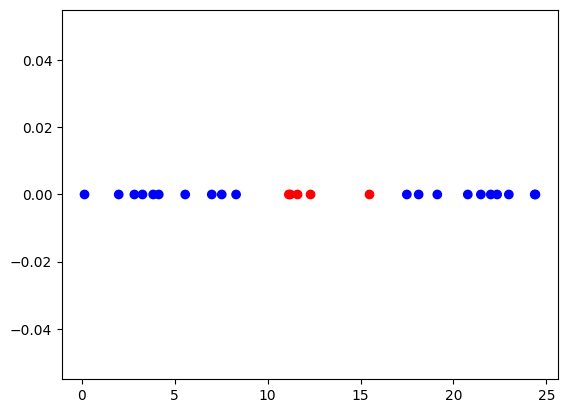

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, tree
from sklearn.preprocessing import StandardScaler

# 데이터 생성
np.random.seed(123)
red_1 = np.random.normal(5, 2, (10, 1))
blue = np.random.normal(12.5, 2, (5, 1))
red_2 = np.random.normal(20, 2, (10, 1))

X = np.vstack((red_1, blue, red_2))
y = np.array([0]*10 + [1]*5 + [0]*10)

# 시각화
plt.scatter(X, [0]*len(X), c=y, cmap='bwr')
plt.show()


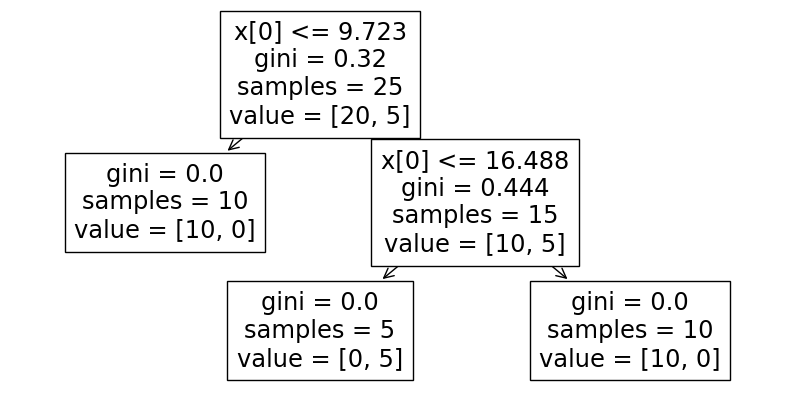

In [2]:
# 결정 트리 학습
clf_tree = tree.DecisionTreeClassifier(random_state=123)
clf_tree = clf_tree.fit(X, y)

# 트리 시각화
plt.figure(figsize=(10, 5))
tree.plot_tree(clf_tree)
plt.show()


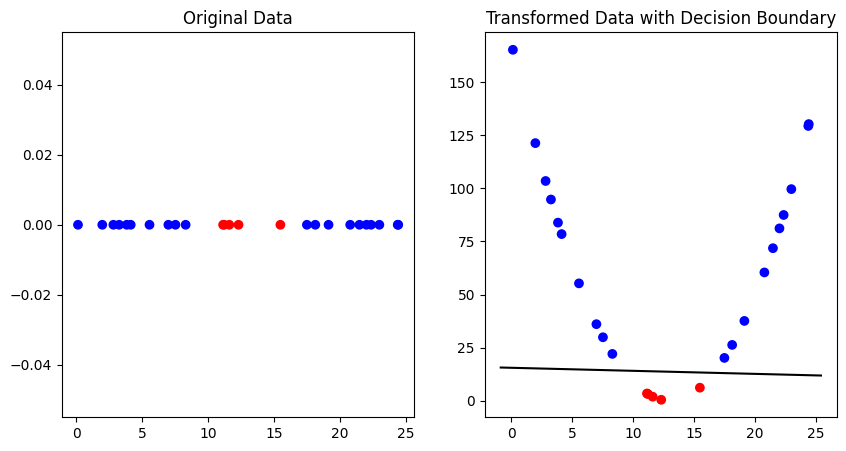

In [4]:
from sklearn.svm import SVC
# 원래 데이터 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, [0]*len(X), c=y, cmap='bwr')
plt.title('Original Data')

# 데이터 변환
X_transformed = np.hstack((X, (X-13)**2))

# SVM 학습
clf_svm = SVC(kernel='linear', random_state=123)
clf_svm = clf_svm.fit(X_transformed, y)

# 결정 경계 시각화
plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='bwr')

xx = np.linspace(X_transformed[:, 0].min() - 1, X_transformed[:, 0].max() + 1)
yy = (-clf_svm.intercept_[0] - clf_svm.coef_[0][0] * xx) / clf_svm.coef_[0][1]

plt.plot(xx, yy, 'k-')
plt.title('Transformed Data with Decision Boundary')
plt.show()
